# DUAW: Building of a recommendation system

_____________________________________________________________________________________________________________________

### **Overview**

- **In the 1st section the problem is stated, an overview over following code document is given and all nessesary libraries are imported**

- **In the 2nd section the development of the recommendation system is explored and coded.**

_____________________________________________________________________________________________________________________

### (A) Problem Understanding:
###### Aim: Based on a displayed project Techlabs three further projects would be proposed
For the DUAW project, we decided to focus on the display of the real project information on the website. The inital data set might be small at the moment (12-24 projects) but as Techlabs Berlin is growing, so will the number of available projects and the available dataset. We decided to implement a recommendation model based on the projects information to increase and facilitate website engagement. Like this the user is then offered the suggestions on which projects to explore next. 
Here the recomendation model for the DUAW website is developed.

### Text based analysis
The following recomendation model is based on the text information from the projects description. In the future the recomendation model can be extended to include project keywords (or "topics" in the github nomenclature), the programming languages used, variation of tracks in the Techlabs teams and many more. 

In [1]:
# import of needed libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### (B) Data Collection and (C) Data Preparation
### Dataset
1. The inital dataset to test different algorithms on consitis of manually added text data for 35 projects,(CSV file)
2. For the website the actual information from the repositories is requested via the Github API (url = "https://api.github.com/orgs/faketechlabsberlin/repos"). It delivers information in a JSON format. For the purpose of this recomendation model the "About" section on the Github repository is accessed via .description and used as the body of text for the recomendation model.
3. The growing number of project repositories from Techlabs displayed which will be displayed on the DUAW website allows for a growing dataset in the future. 

In [2]:
# accessing API requests
import requests

In [3]:
# Load the regular expression library
import re

### (D)  Data Exploration
Exploratory data analysis of the data sets via word clouds.

In [4]:
# Import the wordcloud library
from wordcloud import WordCloud

### (E) Defining the body of documents further used for analysis.

### (F) ML: Comparision of text similarty metrices (Vectorisation and Embeding models)

Several Vectorisation Algorithms are tested for analysis of text similarity. The following implementations follow the same structure:

#### 1) Vectorisation or Embedding of the documents

The following  Vectorisation or Embedding methods are compared:
- **Bag of Words** 
    - **CountVectorizer**
    - **TF-IDF**
- **NLP embedding using Bidirectional Encoder Representations from Transformers (BERT)** 
    - The follwoing pretrained models for Sentence Transformation are compared: 
        - Model 1 : *'bert-base-nli-mean-tokens'*
        - Model 2 : *'all-mpnet-base-v2'*
        - Model 3 : *'all-distilroberta-v1'*

#### 2) Pairwise Similarity analysis with Euclidian Distance and Cosine Similarity
All vectorisations are pairwise compared using Euclidian Distance or Cosine Similarity.

#### 3) Visualitation of the results via Heatmap
Finally to make differences visible heatmaps are used to compare the methods.

In [ ]:
## Bag of Words - CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# Bag of Words - TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
# BERT - Sentence Transformation
from sentence_transformers import SentenceTransformer

In [6]:
# import pairwise similarity analysis metrics 
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity

### (G) ML:  Choice of similarity analysis metric and vectorisation method
with some visualisation of the results via frequency table and network graph

### (H) Final result: JSON file with the repository name and the 3 nearest neighbours

In [7]:
from pyvis.network import Network
import plotly.graph_objects as go
import networkx as nx

In [8]:
import json

### ( I ) Final step: implementation for the actual dataset, which would be growing with the additions of further repositories.
safed on Github, that can be accessed and used as routing directions for the website

_____________________________________________________________________________________________________________________

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [10]:
def display_all(df):
    with pd.option_context('display.max_rows',None,'display.max_columns', None):
        display(df)  

_____________________________________________________________________________________________________________________

## (B) Data Collection

### Data Set 1: manually created data set for evaluation of the algorithms

#### 1) Loading data from CSV file

In [11]:
filename = "DUAW_ Datasheet - Sheet1.csv" # Choose file
whole_table = pd.read_csv(filename)
whole_table.head(3) 

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,future Github repostiory name,Full Project name (for display),up to 350 Char,"3-4 Words, comma seperated",NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Project number,(place for notes for communication),project_name,project_name_full,project_description,project_topics,project_picture,project_picture_large,link to Github repository,...,github_name,github_url,name:,full_name:,track:,github_name:,github_url:,linkedin_url:,email_adress:,display:


#### 2) Data cleaning


In [12]:
data_df = whole_table.iloc[2:,[3,5]]
data_df.rename(columns=data_df.iloc[0], inplace = True)
data_df.drop(data_df.index[0], inplace = True)
data_df.reset_index(inplace = True)
data_df.head(3)

,index,project_name,project_description
0,3,test-repository-1,This is a test repository that helps the DUAW ...
1,4,st21-beachblue,The idea behind Beachblue is to help everyone ...
2,5,st21-what-street-art,What Street Art is an app designed to explore ...


### Data Set 2: information from the repositories requested via the Github API

#### 1) Loading Data from API request: repository names and description

In [13]:
# accessing API requests
import requests

In [14]:
url = "https://api.github.com/orgs/faketechlabsberlin/repos"
repos = requests.get(url)
repos_json = repos.json()
print(type(repos_json))
data_df_api = pd.DataFrame(repos_json)

<class 'list'>


##### 2) Data cleaning

In [15]:
data_df_api = data_df_api[['name','description']].rename(columns={"name": "project_name", "description": "project_description"})
data_df_api.head()

,project_name,project_description
0,st21-terraViz,TerraViz is an interactive map visualization w...
1,st21-stress-tracker,With our Stress Tracker we aim to utilize data...
2,st21-what-the-wine,What the Wine is a team Web/App project develo...
3,st21-jobzilla,Jobzilla is an AI-driven app that helps job se...
4,st21-artifacts,A platform for buying and selling second-hand ...


_____________________________________________________________________________________________________________________

## (C) Data Preparation

#### Removal punctuation/lower casing

In [16]:
def text_processing(df = []):
    # Remove punctuation
    df['project_text_processed'] = \
    df['project_description'].map(lambda x: re.sub('[,\.!?]', '', x))
    # Convert the titles to lowercase
    df['project_text_processed'] = \
    df['project_text_processed'].map(lambda x: x.lower())
    # Print out the first rows of data_df
    df['project_text_processed'].head()
    return df

In [17]:
data_df = text_processing(df = data_df)
#data_df.head()

In [18]:
data_df_api = text_processing(df = data_df_api)
data_df_api.head(3)

,project_name,project_description,project_text_processed
0,st21-terraViz,TerraViz is an interactive map visualization w...,terraviz is an interactive map visualization w...
1,st21-stress-tracker,With our Stress Tracker we aim to utilize data...,with our stress tracker we aim to utilize data...
2,st21-what-the-wine,What the Wine is a team Web/App project develo...,what the wine is a team web/app project develo...


_____________________________________________________________________________________________________________________

## (D) Exploratory data analysis 

wordcloud for dataset 1


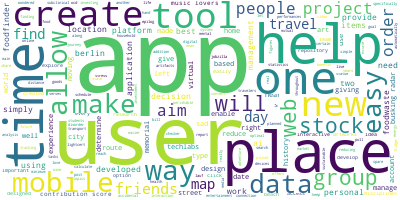

In [19]:
# preparation of wordcloud for dataset 1:
# Join the different processed titles together.
long_string_1 = ','.join(list(data_df['project_text_processed'].values))
# Create a WordCloud object
wordcloud_1 = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud_1.generate(long_string_1)
# Visualize the word cloud
print('wordcloud for dataset 1')
wordcloud_1.to_image()

wordcloud for dataset 2 (API)


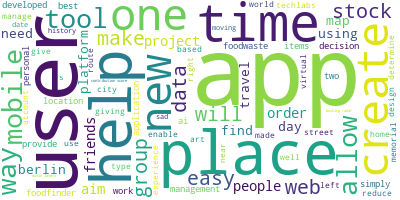

In [20]:
# preparation of wordcloud for dataset 2 (API):
long_string_api = ','.join(list(data_df_api['project_text_processed'].values))
wordcloud_api = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud_api.generate(long_string_1)

# Visualize the word cloud
print('wordcloud for dataset 2 (API)')
wordcloud_api.to_image()

Via the above presented visualisation of frequently via wordclouds it is possible to see that some words are quite common, like app, user, help, place, creat and might influence the text based similarity analyis quite a lot.
Furthermore the datasets are very similar, because the manually created data set it an extension of the current Techlabs repositories to be able to have a larger text body to work with. 

## (E) Defining the body of documents further used for analysis.

**For the further analysis the dataset 1 will be used, simply because it contains a larger body of text as it is a manual extension of dataset 2**

In [21]:
repo_names = data_df.project_name
corpus = data_df.project_text_processed

_____________________________________________________________________________________________________________________

# (F) Comparision of text similarty metrices (Vectorisation and Embeding models)

(https://towardsdatascience.com/overview-of-text-similarity-metrics-3397c4601f50)

Several Vectorisation Algorithms are tested for analysis of text similarity. The following implementations follow the same structure:

### 1) Vectorisation or Embedding of the documents

The following  Vectorisation or Embedding methods are compared:
- **Bag of Words** 
    - **CountVectorizer**
    - **TF-IDF**
- **NLP embedding using Bidirectional Encoder Representations from Transformers (BERT)** 
    - The follwoing pretrained models for Sentence Transformation are compared: 
        - Model 1 : *'bert-base-nli-mean-tokens'*
        - Model 2 : *'all-mpnet-base-v2'*
        - Model 3 : *'all-distilroberta-v1'*

### 2) Pairwise Similarity analysis with Euclidian Distance and Cosine Similarity
All vectorisations are pairwise compared using Euclidian Distance or Cosine Similarity.
#### Euclidan distance vs Cosine_similarity
(https://www.baeldung.com/cs/euclidean-distance-vs-cosine-similarity#overview).

- The **Euclidean distance** corresponds to the L2-norm of a difference between vectors. 
- The **cosine similarity** is proportional to the dot product of two vectors and inversely proportional to the product of their magnitudes.

#### Normalization to compare the distance measurements

For comparision of the distance measurements the results from euclidian distance have to be normalised.
Closeness measuring in ratio (normalisaiton): Ref: https://www.codecademy.com/article/normalization

**Min-max normalization**: Guarantees that all features will have the exact same scale but this does not handle outliers well.

- min-max normalisation: *\frac{value - min}{max - min}*

**Z-score normalization**: Handles outliers well, but does not produce normalized data with the exact same scale.

- Z-Score Normalization: *\frac{value - \mu}{\sigma}* 
- (μ is the mean value of the feature and σ is the standard deviation of the feature)

**Further, for the purpose of comparing the results from similarity analysis *Min-max normalization* is chosen for the Euclidian distance, furthermore the absolute value of the difference between both metrics is used.**


### 3) Visualitation of the results via Heatmap
Finally to make differences visible heatmaps are used to compare the methods.

_____________________________________________________________________________________________________________________

## -  Bag of Words - CountVectorizer

(Source: https://www.mygreatlearning.com/blog/bag-of-words/)

A bag of words is a representation of text that describes the occurrence of words within a document. 
- It keep track of word counts and disregard the grammatical details and the word order. 
- It is called a “bag” of words because any information about the order or structure of words in the document is discarded. 

In [23]:
## Bag of Words - CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

##### 1)  Vectorization

In [24]:
corpus = corpus
vectorizer = CountVectorizer() # numrac list
features = vectorizer.fit_transform(corpus).todense() # each of these documents, in list of numbers
dic_words = vectorizer.vocabulary_ # dic with all existing words (count)
#print(dic_words) 

##### 2)  Pairwise similarity analysis

In [25]:
#calculate cosine similarity
bg_cosine_df = pd.DataFrame(cosine_similarity(features))

#calculate Euclidian distance
bg_euc_df = pd.DataFrame(euclidean_distances(features))
bg_euc_df_normalised = 1-(bg_euc_df/max(bg_euc_df.max()))

#calculate difference between results of both similarity anaylsis algorithms
bg_difference_df = abs(bg_euc_df_normalised - bg_cosine_df)

##### 3) Visualisaiton of the results from both similarity analysis using Bag of Words - CountVectorizer

Similarity analysis using Bag of Words - CountVectorizer


Text(0.5, 1, 'CountVectorizer Difference between both similarity algorithms ')

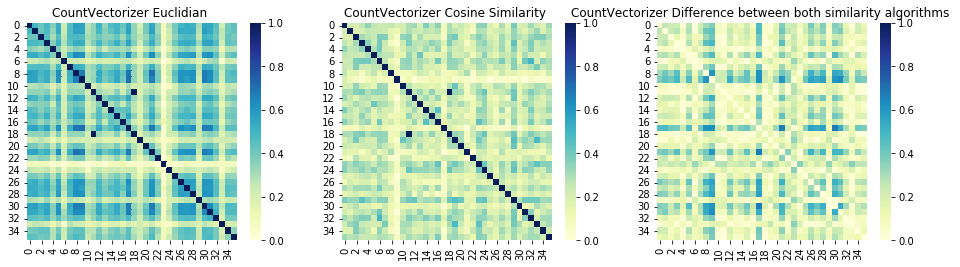

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

print('Similarity analysis using Bag of Words - CountVectorizer')

cmap="YlGnBu" # "Blues" # "BuPu"  #"Greens"
sns.heatmap(ax=axes[0], data=bg_euc_df_normalised, vmin=0, vmax=1, cmap=cmap).set_title('CountVectorizer' + " Euclidian ")
sns.heatmap(ax=axes[1], data=bg_cosine_df, vmin=0, vmax=1, cmap=cmap).set_title('CountVectorizer' + " Cosine Similarity ")
sns.heatmap(ax=axes[2], data=bg_difference_df, vmin=0, vmax=1, cmap=cmap).set_title('CountVectorizer' + " Difference between both similarity algorithms ")

The model is only concerned with whether known words occur in the document, not where in the document is (not context sensitive).
The main issue with term frequency counts shown is that it favors the documents or sentences that are longer and does not differenciate between similar words.

_____________________________________________________________________________________________________________________

## - Bag of Words: TF-IDF
**Algorithm**

- *Step 1*: calculate Term Frequency using Bag of Words results in Term Frequency after lemmatization of the two sentences

- *Step 2*: The main issue with term frequency counts shown is that it favors the documents or sentences that are longer. One way to solve this issue is to normalize the term frequencies with the respective magnitudes or L2 norms. Normalization of term frequencies using L2 Norms by dividing term frequencies with these norms.

- *Step 3*: Calculation of the similarity metrix with the normalized the two vectors which have length of 1

Summary TF-IDF:
1. tf / tf-idf creates one number per word
2. tf / tf-idf is good for classification documents as a whole

In [27]:
# import TfidfVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

##### 1)  Vectorization

In [28]:
documents = corpus
vectorizer = TfidfVectorizer()
embeddings = vectorizer.fit_transform(documents)

##### 2)  Pairwise similarity analysis

In [29]:
#calculate cosine similarity
tf_idf_cosine_df = pd.DataFrame(cosine_similarity(embeddings))

#calculate Euclidian distance
tf_idf_euc_df = pd.DataFrame(euclidean_distances(embeddings))
tf_idf_euc_df_normalised = 1-(tf_idf_euc_df/max(tf_idf_euc_df.max()))

#calculate difference between results of both similarity anaylsis algorithms
tf_idf_difference_df = abs(tf_idf_euc_df_normalised - tf_idf_cosine_df)

##### 3) Visualisaiton of the results from both similarity analysis using TF-IDF vectorization

Similarity analysis using Bag of Words - TF-IDF


Text(0.5, 1, 'TF-IDF Difference between both similarity algorithms ')

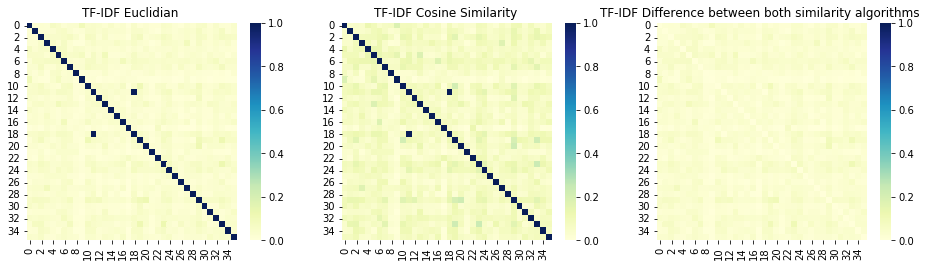

In [30]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

print('Similarity analysis using Bag of Words - TF-IDF')

cmap="YlGnBu" # "Blues" # "BuPu"  #"Greens"
sns.heatmap(ax=axes[0], data=tf_idf_euc_df_normalised, vmin=0, vmax=1, cmap=cmap).set_title('TF-IDF' + " Euclidian ")
sns.heatmap(ax=axes[1], data=tf_idf_cosine_df, vmin=0, vmax=1, cmap=cmap).set_title('TF-IDF' + " Cosine Similarity ")
sns.heatmap(ax=axes[2], data=tf_idf_difference_df, vmin=0, vmax=1, cmap=cmap).set_title('TF-IDF' + " Difference between both similarity algorithms ")

_____________________________________________________________________________________________________________________

## - Embedded vectorisation: BERT

(Sources https://www.analyticsvidhya.com/blog/2021/05/measuring-text-similarity-using-bert/ and https://www.techtarget.com/searchenterpriseai/definition/BERT-language-model)

#### Bidirectional Encoder Representations from Transformers (BERT)

- BERT is an open source machine learning framework for natural language processing (NLP). Google open sourced BERT algorithm in November 2018. BERT is designed to help computers understand the meaning of ambiguous language in text by using surrounding text to establish context. The BERT framework was pre-trained using text from Wikipedia and can be fine-tuned with question and answer datasets.

- BERT, was pre-trained using only an unlabeled, plain text corpus (namely the entirety of the English Wikipedia, and the Brown Corpus). It continues to learn unsupervised from the unlabeled text and improve even as its being used in practical applications (ie Google search). Its pre-training serves as a base layer of "knowledge" to build from. From there, BERT can adapt to the ever-growing body of searchable content and queries and be fine-tuned to a user's specifications. This process is known as transfer learning.

- BERT, which stands for Bidirectional Encoder Representations from Transformers, is based on Transformers, a deep learning model in which every output element is connected to every input element, and the weightings between them are dynamically calculated based upon their connection. (In NLP, this process is called attention.)

- BERT embed the essence of words inside densely bound vectors instead of sparse vectors. BERT is skilled at generating those dense vectors, and all encoder layer (there are numerous) outputs a collection of dense vectors.

### Implementation

The following implementation follows initally https://www.analyticsvidhya.com/blog/2021/05/measuring-text-similarity-using-bert/ and is modified to the needs of this project.

**1) Sentence-Transformers**

The follwoing pretrained models for Sentence Transformation are compared (https://www.sbert.net/docs/pretrained_models.html):

- Model 1 : *'bert-base-nli-mean-tokens'*
- Model 2 : *'all-mpnet-base-v2'*
- Model 3 : *'all-distilroberta-v1'*

**2) Pairwise Similarity analysis with Euclidian Distance and Cosine Similarity**

**3) Visualitation of the results via Heatmap**

**Preparation:**
install sentence-transformers using 
\$ pip install sentence-transformers. 

This library uses HuggingFace’s transformers. 
Further sentence-transformers models can be found here:(https://huggingface.co/sentence-transformers)

In [31]:
from sentence_transformers import SentenceTransformer

In [32]:
model_1 = 'bert-base-nli-mean-tokens'
model_2 = 'all-mpnet-base-v2' 
model_3 = 'all-distilroberta-v1'

### - BERT Model 1: bert-base-nli-mean-tokens

**bert-base-nli-mean-tokens**
- https://huggingface.co/sentence-transformers/bert-base-nli-mean-tokens

##### 1) Sentence Transformation

SentenceTransformer('bert-base-nli-mean-tokens')

In [33]:
sen = corpus
model = SentenceTransformer(model_1)#'bert-base-nli-mean-tokens'
sen_embeddings = model.encode(sen)
sen_embeddings.shape

(36, 768)

Embedding returns a dense matrix, where each row represents the vectorized text for one project, that can be further analysed.
This results in the new 36 sentence embeddings, each holding 768 values.

##### 2)  Pairwise similarity analysis

In [34]:
#calculate cosine similarity
model_1_cosine_df =  pd.DataFrame(cosine_similarity(sen_embeddings))
#calculate Euclidian distance
model_1_euc_df = pd.DataFrame(euclidean_distances(sen_embeddings))
model_1_euc_df_normalised = 1-(model_1_euc_df/max(model_1_euc_df.max()))

#calculate difference between results of both similarity anaylsis algorithms
model_1_difference_df = abs(model_1_euc_df_normalised - model_1_cosine_df)

##### 3) Visualisaiton of the results from both similarity analysis using model_1: 'bert-base-nli-mean-tokens'

Similarity analysis using model_1: ' bert-base-nli-mean-tokens' embedding


Text(0.5, 1, 'bert-base-nli-mean-tokens Difference between both similarity algorithms ')

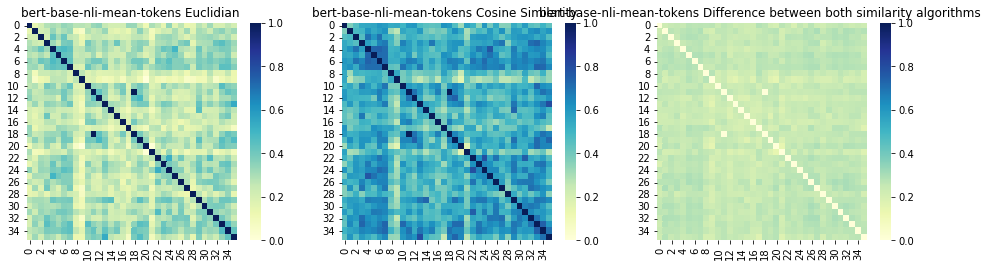

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

print('Similarity analysis using model_1: \' ' + model_1 + '\' embedding')

cmap="YlGnBu" # "Blues" # "BuPu"  #"Greens"
sns.heatmap(ax=axes[0], data=model_1_euc_df_normalised, vmin=0, vmax=1, cmap=cmap).set_title(model_1 + " Euclidian ")
sns.heatmap(ax=axes[1], data=model_1_cosine_df, vmin=0, vmax=1, cmap=cmap).set_title(model_1 + " Cosine Similarity ")
sns.heatmap(ax=axes[2], data=model_1_difference_df, vmin=0, vmax=1, cmap=cmap).set_title(model_1 + " Difference between both similarity algorithms ")

###  - BERT Model 2: all-mpnet-base-v2

**all-mpnet-base-v2**
- Description:	All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs.
- Base Model:	microsoft/mpnet-base
- Max Sequence Length:	384
- Dimensions:	768
- Normalized Embeddings:	true
- Suitable Score Functions:	dot-product (util.dot_score), cosine-similarity (util.cos_sim), euclidean distance
- Size:	418 MB
- Pooling:	Mean Pooling
- Training Data:	1B+ training pairs. For details, see model card.
- Model Card:	https://huggingface.co/sentence-transformers/all-mpnet-base-v2

##### 1) Sentence Transformation

In [36]:
sen = corpus
model = SentenceTransformer(model_2)#''
sen_embeddings = model.encode(sen)
sen_embeddings.shape
#Embedding returns a dense matrix, where each row represents the vectorized text for one project, that can be further analysed

(36, 768)

##### 2)  Pairwise similarity analysis

In [37]:
#calculate cosine similarity
model_2_cosine_df =  pd.DataFrame(cosine_similarity(sen_embeddings))
#calculate Euclidian distance
model_2_euc_df = pd.DataFrame(euclidean_distances(sen_embeddings))
model_2_euc_df_normalised = 1-(model_2_euc_df/max(model_2_euc_df.max()))

#calculate difference between results of both similarity anaylsis algorithms
model_2_difference_df = abs(model_2_euc_df_normalised - model_2_cosine_df)

##### 3) Visualisaiton of the results from both similarity analysis using model_2: 'all-mpnet-base-v2'

Similarity analysis using model_2: ' all-mpnet-base-v2' embedding


Text(0.5, 1, 'all-mpnet-base-v2 Difference between both similarity algorithms ')

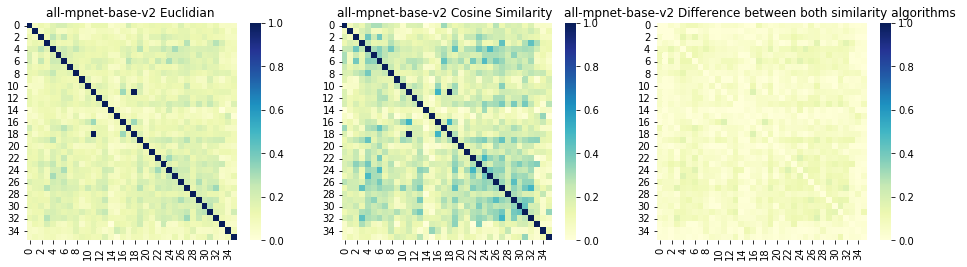

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

print('Similarity analysis using model_2: \' ' + model_2 + '\' embedding')

cmap="YlGnBu" # "Blues" # "BuPu"  #"Greens"
sns.heatmap(ax=axes[0], data=model_2_euc_df_normalised, vmin=0, vmax=1, cmap=cmap).set_title(model_2 + " Euclidian ")
sns.heatmap(ax=axes[1], data=model_2_cosine_df, vmin=0, vmax=1, cmap=cmap).set_title(model_2 + " Cosine Similarity ")
sns.heatmap(ax=axes[2], data=model_2_difference_df, vmin=0, vmax=1, cmap=cmap).set_title(model_2 + " Difference between both similarity algorithms ")

### - BERT Model 3: all-distilroberta-v1

**all-distilroberta-v1**
- Description:	All-round model tuned for many use-cases. Trained on a large and diverse dataset of over 1 billion training pairs.
- Base Model:	distilroberta-base
- Max Sequence Length:	512
- Dimensions:	768
- Normalized Embeddings:	true
- Suitable Score Functions:	dot-product (util.dot_score), cosine-similarity (util.cos_sim), euclidean distance
- Size:	292 MB
- Pooling:	Mean Pooling
- Training Data:	1B+ training pairs. For details, see model card.
- Model Card:	https://huggingface.co/sentence-transformers/all-distilroberta-v1

##### 1) Sentence Transformation

In [39]:
sen = corpus
model = SentenceTransformer(model_3)#'all-distilroberta-v1'
sen_embeddings = model.encode(sen)
sen_embeddings.shape
#Embedding returns a dense matrix, where each row represents the vectorized text for one project, that can be further analysed

(36, 768)

##### 2)  Pairwise similarity analysis

In [40]:
#calculate cosine similarity
model_3_cosine_df =  pd.DataFrame(cosine_similarity(sen_embeddings))
#calculate Euclidian distance
model_3_euc_df = pd.DataFrame(euclidean_distances(sen_embeddings))
model_3_euc_df_normalised = 1-(model_3_euc_df/max(model_3_euc_df.max()))

#calculate difference between results of both similarity anaylsis algorithms
model_3_difference_df = abs(model_3_euc_df_normalised - model_3_cosine_df)

##### 3) Visualisaiton of the results from both similarity analysis using model_3: 'all-distilroberta-v1'

Similarity analysis using model_1: ' all-distilroberta-v1' embedding


Text(0.5, 1, 'all-distilroberta-v1 Difference between both similarity algorithms ')

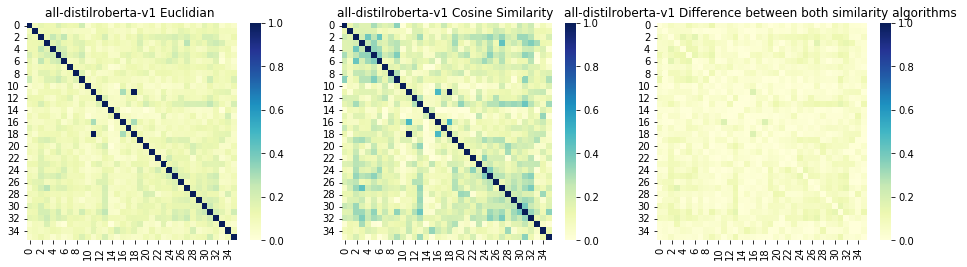

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(16, 4))

print('Similarity analysis using model_1: \' ' + model_3 + '\' embedding')

cmap="YlGnBu" # "Blues" # "BuPu"  #"Greens"
sns.heatmap(ax=axes[0], data=model_3_euc_df_normalised, vmin=0, vmax=1, cmap=cmap).set_title(model_3 + " Euclidian ")
sns.heatmap(ax=axes[1], data=model_3_cosine_df, vmin=0, vmax=1, cmap=cmap).set_title(model_3 + " Cosine Similarity ")
sns.heatmap(ax=axes[2], data=model_3_difference_df, vmin=0, vmax=1, cmap=cmap).set_title(model_3 + " Difference between both similarity algorithms ")


_____________________________________________________________________________________________________________________

## (G) ML:  Choice of similarity analysis metric and vectorisation method

### Chosing Cosine similarity analysis over Euclidian Distance

##### Euclidan distance vs Cosine_similarity
(https://www.baeldung.com/cs/euclidean-distance-vs-cosine-similarity#overview)

Until now both similarity metric **Euclidean distance** (shortest distance) and **cosine similarity** (tiniest angle) have been used to evaluate the vectorisation models individually. 

To **decide which similarity metric to use** depends on the particular task that needs to be performed:
- Some tasks, such as preliminary data analysis, benefit from both metrics; each of them allows the extraction of different insights on the structure of the data.

- Others, such as text classification, generally function better under Euclidean distances
- Some more, such as retrieval of the most similar texts to a given document, generally function better with cosine similarity

**Since for the recomendation model the idea is to find the of the most similar texts to a given document, cosine similarity is used further.**

### Chosing Model for recomendation model

Comparing the cosine similarity results of all three sentence transformation models 
BERT: model_1 refers tobert-base-nli-mean-tokens
BERT: model_2 refers toall-mpnet-base-v2
BERT: model_3 refers toall-distilroberta-v1


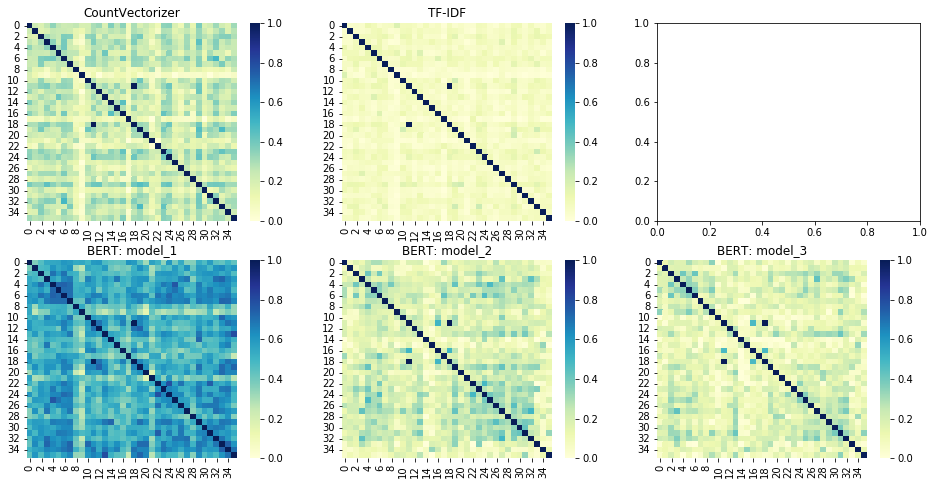

In [42]:
print('Comparing the cosine similarity results of all three sentence transformation models ')

fig, axes = plt.subplots(2, 3, figsize=(16, 8))

cmap="YlGnBu" # "Blues" # "BuPu"  #"Greens"
sns.heatmap(ax=axes[0,0], data=bg_cosine_df, vmin=0, vmax=1, cmap=cmap).set_title('CountVectorizer')
sns.heatmap(ax=axes[0,1], data=tf_idf_cosine_df, vmin=0, vmax=1, cmap=cmap).set_title('TF-IDF')

sns.heatmap(ax=axes[1,0], data=model_1_cosine_df, vmin=0, vmax=1, cmap=cmap).set_title('BERT: model_1')
sns.heatmap(ax=axes[1,1], data=model_2_cosine_df, vmin=0, vmax=1, cmap=cmap).set_title('BERT: model_2')
sns.heatmap(ax=axes[1,2], data=model_3_cosine_df, vmin=0, vmax=1, cmap=cmap).set_title('BERT: model_3')

print('BERT: model_1 refers to' + model_1)
print('BERT: model_2 refers to' + model_2)
print('BERT: model_3 refers to' + model_3)

Here bag of word algorithms (upper figures) and embeddings (lower figures) are compared. 

There are two main difference between tf/ tf-idf with bag of words and word embeddings:
1. tf / tf-idf creates one number per word, word embeddings typically creates one vector per word.
2. tf / tf-idf is good for classification documents as a whole, but word embeddings is good for identifying contextual content.
Embedding is chosen over Bag of word algorithms because it allows for identification of contextual content.

For the embedding algorithms three BERT models were compared. Comparing all these models visually (via heatmap) is only a first step and it nessesary to rely on the automatic model comparison in the BERT documentation: https://www.sbert.net/_static/html/models_en_sentence_embeddings.html
- BERT: model_1 refers tobert-base-nli-mean-tokens
- BERT: model_2 refers toall-mpnet-base-v2
- BERT: model_3 refers toall-distilroberta-v1

The model_1 is deprecated, but was used here for highliting how the results depend on the chosen models.
Since the model_1 is discontinued and model_2 and model_3 seem to give very similar results, BERT model_2 is chosen as the embedding model for the recomendation model.

_____________________________________________________________________________________________________________________

**For the implementaion of the recomendation model the Sentence Transformation Model "all-mpnet-base-v2" is chosen.**

_____________________________________________________________________________________________________________________

# (H) Final result: Return List of sorted results

### Conversion of results into list of results, sorted from most similar to least similar

In [45]:
#sorting of results from similarity analysis
def sorted_results_by_name(df = []):
    list_of_lists =[]
    for each in df.columns: # for each column in data frame
        list_series=[]
        current_series = df[each]
        sorted_series = current_series.sort_values(ascending=False)
       # return list with repositoryies
        
        for each in sorted_series.index:
            list_series.append(repo_names[each]) # append list 
        list_of_lists.append(list_series)

    return pd.DataFrame(list_of_lists)

In [46]:
results_df = sorted_results_by_name(df = model_2_cosine_df)
results_df.head(3)

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,test-repository-1,Osoroi Code,st21-what-the-wine,st21-artifacts,Deely,st21-busking-radar,st21-jobzilla,DogBreedDetec App,Bird$Eye,AllOkayApp,...,Reef,Lightcert,st21-beachblue,NutriFinder,Sustainvest,ImmoScan,NoSAD,DistanceChecker,wt22-schedule-n,Let’s Remember
1,st21-beachblue,st21-busking-radar,Places,Xploro world,Planned Adventure,Deely,LaufDiggy,Blindlov,Travel-20,The Pride App,...,st21-what-the-wine,st21-what-street-art,test-repository-1,st21-artifacts,st21-stress-tracker,wt22-schedule-n,Food Finder,Foodfinder,Sustainvest,ImmoScan
2,st21-what-street-art,st21-busking-radar,st21-artifacts,Places,Lithops,LaufDiggy,st21-terraViz,DogBreedDetec App,Epilog Memorial,The Pride App,...,Foodfinder,Food Finder,ImmoScan,Verropay,st21-beachblue,Sustainvest,NoSAD,NutriFinder,wt22-schedule-n,st21-stress-tracker


### Visualisation of the results: Frequency of the proposed repositories

In [47]:
def frequency_table(df = []): 
    frequency_df = pd.DataFrame(repo_names).set_index('project_name')
    for each in df.columns: 
        temp=df[each]
        frequency_df[each] = 0
        for val, cnt in temp.value_counts().iteritems():
            frequency_df[each][val]= cnt
    return frequency_df

In [48]:
frequency_df = frequency_table(df = results_df)

frequency_df.head(3)
#frequency_df

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
project_name,,,,,,,,,,,,,,,,,,,,,
test-repository-1,1,0,1,0,0,0,0,0,1,0,...,2,1,3,0,1,0,3,2,0,1
st21-beachblue,1,0,0,0,0,0,0,0,0,0,...,1,2,2,1,4,0,4,1,1,2
st21-what-street-art,1,0,0,2,1,0,0,0,2,1,...,2,2,3,0,0,0,0,3,0,0


Note: the identical repositories 'Foodfinder' and 'Food finder' raise issues with the return of the right repositoriy. This is a downfall of the current algorithm. For the practical application this will only be a problem if a project is accedentially duplicated in the github repository for Techlabs.

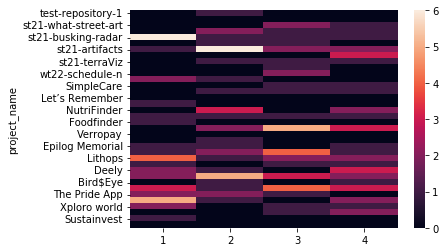

In [49]:
fx = sns.heatmap(frequency_df.T.iloc[:][1:5].T)

### Visualisation of the results: Representation of the results in a "network" graph

In [50]:
#### Visualisation of Network
#https://towardsdatascience.com/visualizing-networks-in-python-d70f4cbeb259
#$ pip install pyvis
from pyvis.network import Network
import plotly.graph_objects as go
import networkx as nx

1st neigbours


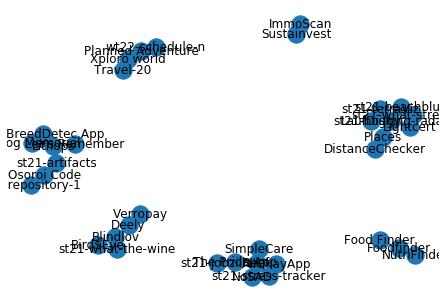

2nd neigbours


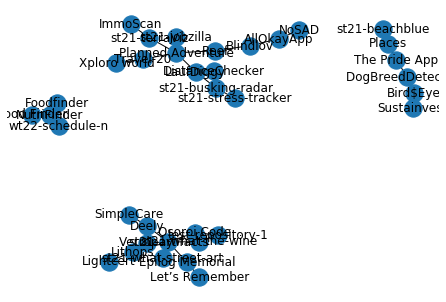

3rd neigbours


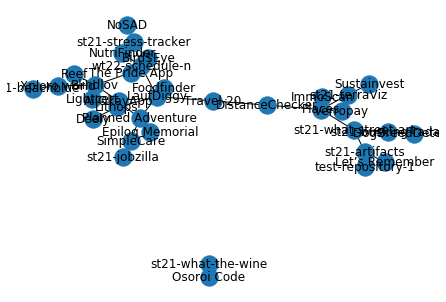

In [54]:
# Creating a graph
#G=nx.from_pandas_edgelist(db, 'from', 'to')
print('1st neigbours')
G1=nx.from_pandas_edgelist(results_df, 0, 1)
# Plot it

nx.draw(G1, with_labels=True)
plt.show()
print('2nd neigbours')
G2=nx.from_pandas_edgelist(results_df, 0, 2)
nx.draw(G2, with_labels=True)
plt.show()

print('3rd neigbours')
G3=nx.from_pandas_edgelist(results_df, 0, 3)
nx.draw(G3, with_labels=True)
plt.show()


This is a preliminary representation of the parents to their third neigbour. Like this it visible that it should be possible to reach any repository by clicking on one of the first three suggestions. 

_____________________________________________________________________________________________________________________

## (H) Final result: Export results in JSON files
Finally to be able to display the recomendations for each project on the DUAW website, the results need to be exported in a usable format, where the parent repository is the key and the recomendations (or neighbours) are elements of that object.

We return around the identical results — the only distinction being that the cosine similarity for index three has slipped from 0.5547 to 0.5548 — an insignificant variation due to rounding.
That’s all for this introduction to mapping the semantic similarity of sentences using BERT reviewing sentence-transformers and a lower-level explanation with Python-PyTorch and transformers.

In [56]:
import json

In [59]:
highest_results=results_df.iloc[:,0:4]
#highest_results.set_index(0)
highest_results.head(3)

,0,1,2,3
0,test-repository-1,Osoroi Code,st21-what-the-wine,st21-artifacts
1,st21-beachblue,st21-busking-radar,Places,Xploro world
2,st21-what-street-art,st21-busking-radar,st21-artifacts,Places


In [65]:
# creat a dictionary from Dataframe results
highest_results_dic = highest_results.set_index(0).T.to_dict('list')

# Convert Dictionary to JSON and export it to a JSON format:
#highest_results_dic_json = json.dumps(highest_results_dic, sort_keys=True, indent=4)

# Export Dictionary of the results to an external JSON file:
with open('recomendations_test.json', 'w') as f:
    json.dump(highest_results_dic, f,  sort_keys=True, indent=4)


highest_results_dic

{'test-repository-1': ['Osoroi Code', 'st21-what-the-wine', 'st21-artifacts'],
 'st21-beachblue': ['st21-busking-radar', 'Places', 'Xploro world'],
 'st21-what-street-art': ['st21-busking-radar', 'st21-artifacts', 'Places'],
 'Travel-20': ['Xploro world', 'Planned Adventure', 'LaufDiggy'],
 'st21-busking-radar': ['Lightcert', 'LaufDiggy', 'st21-what-street-art'],
 'st21-what-the-wine': ['Blindlov', 'st21-artifacts', 'Osoroi Code'],
 'st21-artifacts': ['Lithops', 'Osoroi Code', 'st21-what-street-art'],
 'st21-jobzilla': ['The Pride App', 'Planned Adventure', 'SimpleCare'],
 'st21-terraViz': ['st21-busking-radar', 'Planned Adventure', 'Places'],
 'st21-stress-tracker': ['Reef', 'st21-busking-radar', 'wt22-schedule-n'],
 'wt22-schedule-n': ['Planned Adventure', 'NutriFinder', 'LaufDiggy'],
 'Foodfinder': ['Food Finder', 'NutriFinder', 'LaufDiggy'],
 'SimpleCare': ['Reef', 'Deely', 'Planned Adventure'],
 'AllOkayApp': ['Reef', 'Blindlov', 'Planned Adventure'],
 'Let’s Remember': ['Lithops'

_____________________________________________________________________________________________________________________

### ( I ) Final step: implementation for the actual dataset, please refer to file recomender-system.ipynb
The file recomender-system.ipynb will be safed on Github, and can be accessed and used as routing directions on the website to suggest similar projects to the user.